# Project 1 - Write A Data Science Blog Post 



## Analyze Stack Overflow Data - 2017 Survey

In this project, we were given access to the Stack Overflow Survey Data from 2017. We are going to answer three questions regarding this dataset. The analysis was done on those people who were only developers, thus the survey data was filtered to only developers.

The questions that we answered were as followed.

### Questions

1. Which country has the highest percentage of most years programmed for developers? 
2. Is the job satisfaction for developers higher if they majored in Computer Science as an undergraduate student?
3. Do developers who work at a bigger company have higher salary than those who do not?

## Preparing Data

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from matplotlib.colors import ListedColormap


import warnings
import pandasql
warnings.filterwarnings('ignore') #We imported this to ignore some warnings we were getting about using loc vs iloc
# The resource I used to ignore the warnings
# https://stackoverflow.com/questions/14463277/how-to-disable-python-warnings

data = pd.read_csv('survey_results_public.csv')


In [2]:
# First, we want to only get the data from developers
developers = data[data['Professional'] == 'Professional developer']

# Next, we want to check for any missing values in the JobSatisfaction column
# If there are missing values, then we'll patch them in with the mode
developers['JobSatisfaction'] = developers['JobSatisfaction'].fillna(developers['JobSatisfaction'].mode())

# Then, we're cleaning out the missing values in the other columns that we're interested in using
developers = developers.dropna(subset=['YearsProgram'])

developers = developers.dropna(subset=['MajorUndergrad'])

developers = developers.dropna(subset=['CompanySize'])


In [3]:
# The resource I used to change the columns to a categorical
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Categorical.html

# Finally we wanted to change a couple columns to be a Categorical variable
# with categories that were manually inputted
developers['YearsProgram'] = pd.Categorical(developers['YearsProgram'], categories=['20 or more years',
                                                                                    '19 to 20 years',
                                                                                    '18 to 19 years',
                                                                                    '17 to 18 years',
                                                                                    '16 to 17 years',
                                                                                    '15 to 16 years',
                                                                                    '14 to 15 years',
                                                                                    '13 to 14 years',
                                                                                    '12 to 13 years',
                                                                                    '11 to 12 years',
                                                                                    '10 to 11 years',
                                                                                    '9 to 10 years',
                                                                                    '8 to 9 years',
                                                                                    '7 to 8 years',
                                                                                    '6 to 7 years',
                                                                                    '5 to 6 years',
                                                                                    '4 to 5 years',
                                                                                    '3 to 4 years',
                                                                                    '2 to 3 years',
                                                                                    '1 to 2 years'], ordered=True)

developers['CompanySize'] = pd.Categorical(developers['CompanySize'], categories=['10,000 or more employees',
                                                                                  '5,000 to 9,999 employees',
                                                                                  '1,000 to 4,999 employees',
                                                                                  '500 to 999 employees',
                                                                                  '100 to 499 employees',
                                                                                  '20 to 99 employees',
                                                                                  '10 to 19 employees',
                                                                                  'Fewer than 10 employees',
                                                                                  "I don't know",
                                                                                  'I prefer not to say'], ordered=True)

## Explore the data

##### 1. Country with the highest percentage of  most years programmed

**Note: For this question, I decided to determine that 17-20+ years of programming was the treshold of most years of programmed.**


In [4]:
# We wanted to take the survey results from the countries with the top 10 total respondants
top_10 = list(developers['Country'].value_counts().head(10).index)
developers_from_top_10 = developers[developers['Country'].isin(top_10)]

aggregate_country = developers_from_top_10.groupby(['Country', 'YearsProgram'], as_index=False)['Respondent'].count()

# Gets number of repondents for each country
respondents_per_top_10 = developers_from_top_10['Country'].value_counts()

aggregate_country['Percentage'] = aggregate_country.apply(lambda x: x['Respondent'] / respondents_per_top_10[x['Country']], axis = 1).round(4)
aggregate_country = aggregate_country[['Country', 'YearsProgram', 'Percentage']]

# Pivoting data
# Resource I used to pivot data
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html
pivoted_country = pd.pivot_table(aggregate_country, index = 'Country', columns = 'YearsProgram', values = 'Percentage').sort_values('20 or more years', ascending = False)


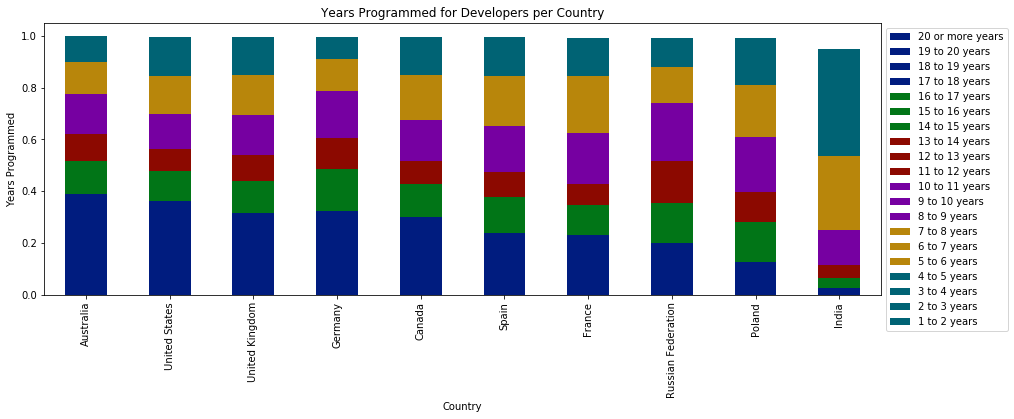

In [5]:
pivoted_country.plot(kind = 'bar', stacked = True, colormap = ListedColormap(sns.color_palette("dark")), figsize = (15,5))
plt.legend(loc="upper left", bbox_to_anchor = (1,1))
plt.ylabel('Years Programmed')
plt.title('Years Programmed for Developers per Country')
plt.show()

In the visualization above, we can see that **Australia showed the highest percentage with almost 40% of developers** responding that they had 17+ years of experience of programming. 

Besides Australia being the country with the highest percent of most years programmed, a notable fact would be that **5 out of the 10 countries I looked into were from Europe**.

##### 2. Job satisfaciton and Computer Science Major


In [6]:
# Helper function that determines whether the developer was a CS major as an undergrad
def major_is_cs(value):
    '''
    Input: The major of the developer's undegraduate schooling
    Output/Return: Whether or not the student was a Computer Science major as an undergraduate (Bool)
    '''
    if value == 'Computer science or software engineering':
        return True
    return False

developers['IsCS'] = developers['MajorUndergrad'].apply(major_is_cs)

# Calculate the percentage of CS and non CS
major_cs = developers['IsCS'].value_counts()[1]/developers['IsCS'].count()
major_non_cs = developers['IsCS'].value_counts()[0]/developers['IsCS'].count()

# Print
print('Percentage of developers who majored in CS: {}'.format(major_cs))
print('Percentage of developers who did not major in CS: {}'.format(major_non_cs))

Percentage of developers who majored in CS: 0.5484915277586444
Percentage of developers who did not major in CS: 0.45150847224135554


In [7]:
aggregate_iscs = developers.groupby(['IsCS', 'JobSatisfaction'], as_index=False)['Respondent'].count()

# Number of respondents for CS major or not
respondents_per_major = developers['IsCS'].value_counts()

aggregate_iscs['Percentage'] = aggregate_iscs.apply(lambda x: x['Respondent'] / respondents_per_major[x['IsCS']], axis = 1).round(4)
aggregate_iscs = aggregate_iscs[['IsCS', 'JobSatisfaction', 'Percentage']]

# Pivoting data
# Resource I used to pivot data
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.pivot.html
pivoted_cs = pd.pivot_table(aggregate_iscs, index = 'IsCS', columns = 'JobSatisfaction', values = 'Percentage')


In [8]:
pivoted_cs

JobSatisfaction,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0
IsCS,,,,,,,,,,,
False,0.0103,0.0095,0.0208,0.0406,0.0459,0.0892,0.1166,0.1983,0.2258,0.1396,0.0943
True,0.0106,0.0075,0.0220,0.0379,0.0460,0.0926,0.1203,0.1992,0.2235,0.1395,0.0929


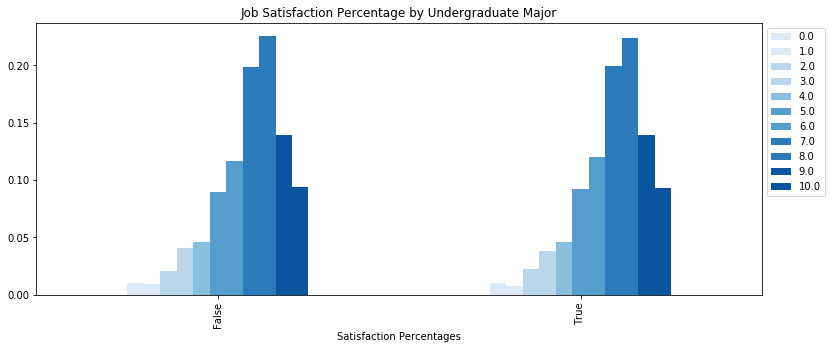

In [9]:
# Visualize the data
pivoted_cs.plot(kind = 'bar', stacked = False, colormap = ListedColormap(sns.color_palette("Blues")), figsize = (13,5))
plt.title('Job Satisfaction Percentage by Undergraduate Major')
plt.xlabel('Satisfaction Percentages')
plt.legend(loc="upper left", bbox_to_anchor = (1,1))
plt.show()

Looking at the visualization and table above, we can see that the **percentage of developers for each job satifaction is fairly evenly split** between developers who majored in Computer Science compared to those who did not major in Computer Science as an undergraduate student. 

The **biggest difference in percentage between the job satisfcation was 0.0037% in favor for developers** who majored in Computer Science as an undergraduate student.

##### 3. Salary and Company Size


In [10]:
# Find mean salary for each Company Size
salary_per_company_size = developers.groupby('CompanySize', as_index=False)['Salary'].mean()

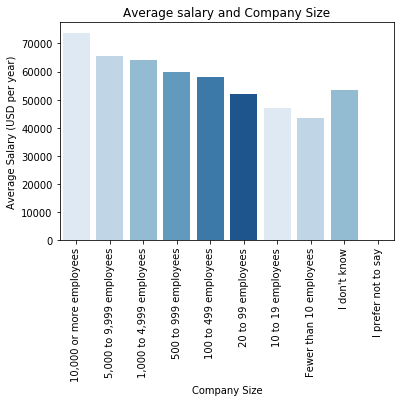

In [11]:
# Visualize data
sns.barplot(data=salary_per_company_size, x='CompanySize', y='Salary', palette=sns.color_palette("Blues"))
plt.title('Average salary and Company Size')
plt.ylabel('Average Salary (USD per year)')
plt.xlabel('Company Size')
plt.xticks(rotation=90)
plt.figure(figsize=(16,8))
plt.show()

In [12]:
salary_per_company_size

,CompanySize,Salary
0,"10,000 or more employees",73891.572358
1,"5,000 to 9,999 employees",65454.384635
2,"1,000 to 4,999 employees",63991.162541
3,500 to 999 employees,59949.570986
4,100 to 499 employees,57875.938651
5,20 to 99 employees,51923.514260
6,10 to 19 employees,46859.296180
7,Fewer than 10 employees,43492.077657
8,I don't know,53337.097394
9,I prefer not to say,NaN


From the visualization and the data table shown above, we can see that **the bigger the company size is, the higher their average salary**. 

However, let's take a quick step back and remember that remember an important part of statistics. **Causation is not the same thing as correlation**. Just because our visualization shows a positive correlation between bigger company size and average salary, that does not mean that working for a bigger company will guarantee a higher salary. It does seem logical, however, that bigger companies would have more revenue and funding that would allow for developers to be paid more.

## Conclusion

Let's recap what we covered in this analysis of the Stack Overflow Survey Data 2017. 

We set out to answer these 3 questions:
1. Which country has the highest percentage of most years programmed for developers? 
2. Is the job satisfaction for developers higher if they majored in Computer Science as an undergraduate student?
3. Do developers who work at a bigger company have higher salary than those who do not?

Our conclusions?
1. We found that that **country with the highest percentage of most years programmed (which we determined to be 17+ years of programming) was Australia**. However, we also noted that **Europe had 5 countries within the top 10 countries that we took a look at.**
2. We also found that just because a developer majored in Computer Science **did not mean that they had a higher job satisfaction.** We saw that the percentage per job satisfaction (scale of 0 to 10) was fairly even between CS majors and not.
3. Finally we found that there was a **positive correlation between bigger company sizes and average salaries.**